# Air Pollution Forecasting Using FBProphet

## Import Data

In [68]:
import pandas as pd

In [118]:
df = pd.read_csv('data_imputed.csv')
df.head()

,timestamp_local,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
0,2022-02-01 00:00:00,12.6,Gujrāt,PK,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
1,2022-02-01 01:00:00,11.5,Gujrāt,PK,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2,2022-02-01 02:00:00,11.9,Gujrāt,PK,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
3,2022-02-01 03:00:00,12.2,Gujrāt,PK,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
4,2022-02-01 04:00:00,11.9,Gujrāt,PK,430.0,1782.5,60.7,2.7,533.7,377.00,253.3


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18218 entries, 0 to 18217
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp_local  18218 non-null  object 
 1   temp             18218 non-null  float64
 2   city_name        18218 non-null  object 
 3   country_code     18218 non-null  object 
 4   aqi              18218 non-null  float64
 5   co               18218 non-null  float64
 6   no2              18218 non-null  float64
 7   o3               18218 non-null  float64
 8   pm10             18218 non-null  float64
 9   pm25             18218 non-null  float64
 10  so2              18218 non-null  float64
dtypes: float64(8), object(3)
memory usage: 1.5+ MB


In [120]:
df['timestamp_local'] = pd.to_datetime(df['timestamp_local'])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18218 entries, 0 to 18217
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp_local  18218 non-null  datetime64[ns]
 1   temp             18218 non-null  float64       
 2   city_name        18218 non-null  object        
 3   country_code     18218 non-null  object        
 4   aqi              18218 non-null  float64       
 5   co               18218 non-null  float64       
 6   no2              18218 non-null  float64       
 7   o3               18218 non-null  float64       
 8   pm10             18218 non-null  float64       
 9   pm25             18218 non-null  float64       
 10  so2              18218 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 1.5+ MB


In [8]:
temp = df[['timestamp_local','temp']]

In [9]:
temp.head()

,timestamp_local,temp
0,2022-02-01 00:00:00,12.6
1,2022-02-01 01:00:00,11.5
2,2022-02-01 02:00:00,11.9
3,2022-02-01 03:00:00,12.2
4,2022-02-01 04:00:00,11.9


In [10]:
temp = temp.rename(columns={'timestamp_local': 'ds', 'temp': 'y'})

In [11]:
temp.head()

,ds,y
0,2022-02-01 00:00:00,12.6
1,2022-02-01 01:00:00,11.5
2,2022-02-01 02:00:00,11.9
3,2022-02-01 03:00:00,12.2
4,2022-02-01 04:00:00,11.9


In [18]:
temp.tail()

,ds,y
18213,2024-02-29 19:00:00,20.7
18214,2024-02-29 20:00:00,18.1
18215,2024-02-29 21:00:00,18.5
18216,2024-02-29 22:00:00,17.4
18217,2024-02-29 23:00:00,17.4


In [19]:
X = temp[:-168]

In [20]:
y = temp[-168:]

In [21]:
X.head()

,ds,y
0,2022-02-01 00:00:00,12.6
1,2022-02-01 01:00:00,11.5
2,2022-02-01 02:00:00,11.9
3,2022-02-01 03:00:00,12.2
4,2022-02-01 04:00:00,11.9


In [22]:
X.tail()

,ds,y
18045,2024-02-22 19:00:00,15.9
18046,2024-02-22 20:00:00,14.8
18047,2024-02-22 21:00:00,14.8
18048,2024-02-22 22:00:00,13.3
18049,2024-02-22 23:00:00,13.0


In [23]:
y.head()

,ds,y
18050,2024-02-23 00:00:00,13.0
18051,2024-02-23 01:00:00,12.2
18052,2024-02-23 02:00:00,12.2
18053,2024-02-23 03:00:00,10.7
18054,2024-02-23 04:00:00,10.7


In [24]:
y.tail()

,ds,y
18213,2024-02-29 19:00:00,20.7
18214,2024-02-29 20:00:00,18.1
18215,2024-02-29 21:00:00,18.5
18216,2024-02-29 22:00:00,17.4
18217,2024-02-29 23:00:00,17.4


## Model Fitting

In [31]:
from prophet import Prophet

In [32]:
m = Prophet()
m.fit(X)

20:56:46 - cmdstanpy - INFO - Chain [1] start processing
20:57:05 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [34]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,19.192904,15.917990,22.674706
18212,2024-02-29 20:00:00,17.839533,14.430075,21.026113
18213,2024-02-29 21:00:00,16.936351,13.460699,20.435539
18214,2024-02-29 22:00:00,16.431493,13.237522,19.757972
18215,2024-02-29 23:00:00,16.038449,12.815928,19.065345


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


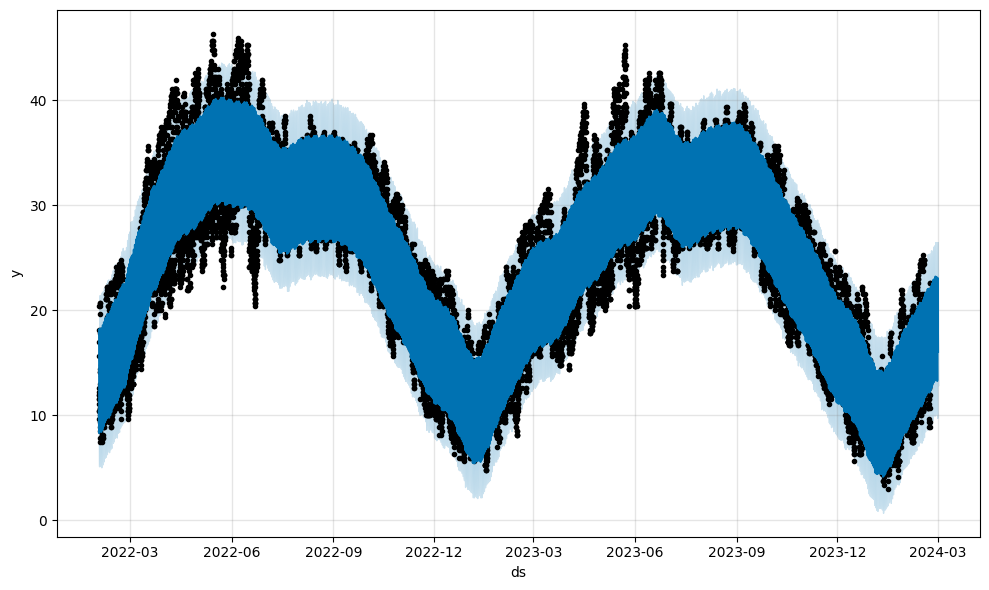

In [35]:
fig1 = m.plot(forecast)

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

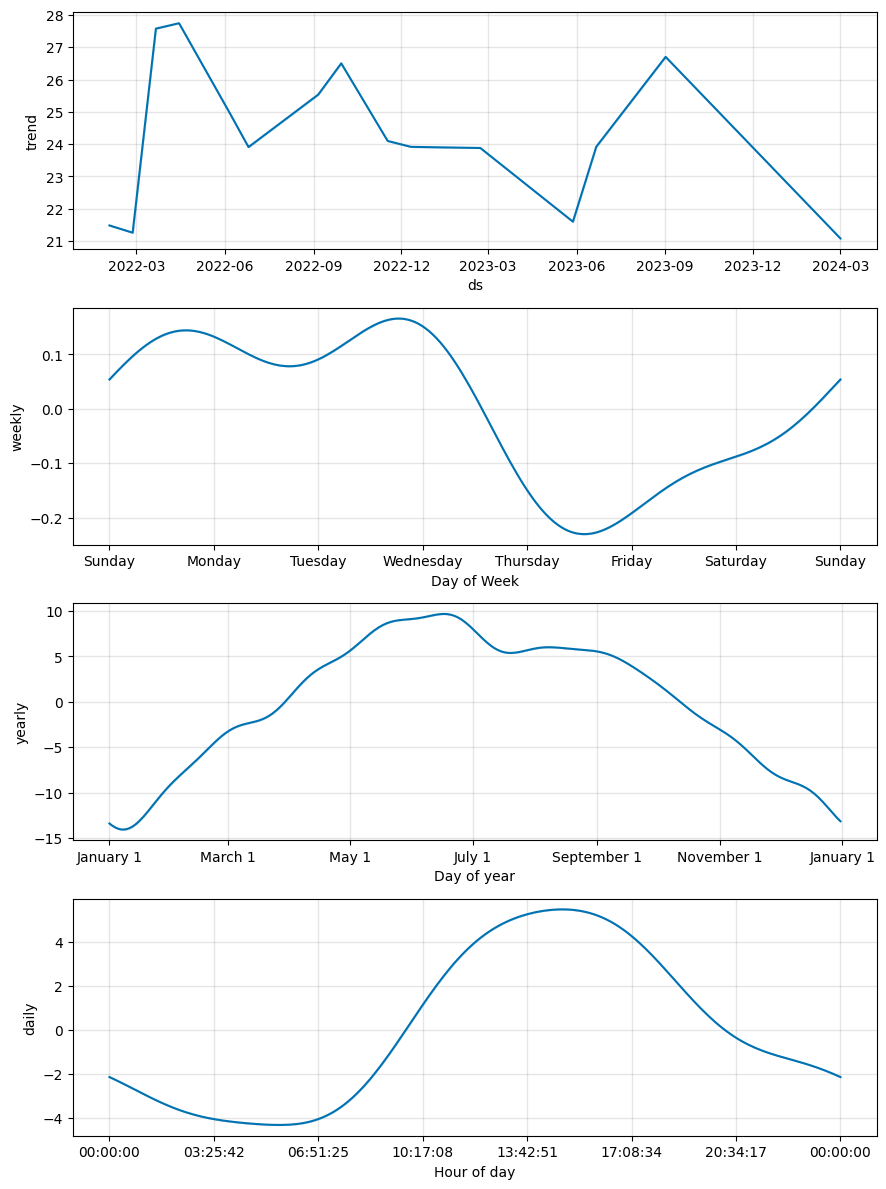

In [36]:
fig2 = m.plot_components(forecast)

In [40]:
predicted = forecast[-168:]

In [42]:
((y['y']-predicted['yhat'])**2).mean()**0.5

3.1013412881739084

## Non Stationary

In [43]:
m = Prophet(interval_width=0.95)
m.fit(X)

21:07:39 - cmdstanpy - INFO - Chain [1] start processing
21:07:59 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,19.192904,14.153369,24.384655
18212,2024-02-29 20:00:00,17.839533,12.761110,22.628335
18213,2024-02-29 21:00:00,16.936351,11.600629,22.113623
18214,2024-02-29 22:00:00,16.431493,11.468549,21.374717
18215,2024-02-29 23:00:00,16.038449,11.129613,20.622645


<Axes: xlabel='ds'>

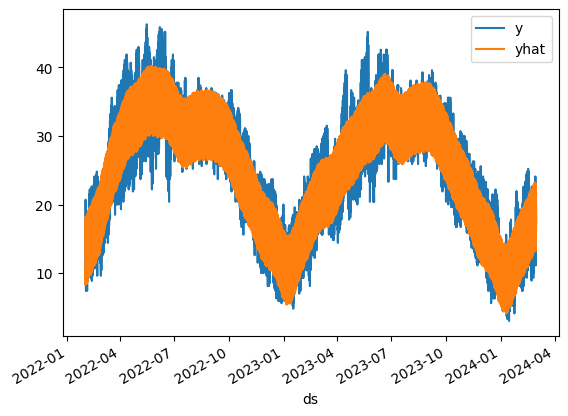

In [46]:
pd.concat([temp.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [47]:
((y['y']-predicted['yhat'])**2).mean()**0.5

3.1013412881739084

## Multiplicative

In [48]:
m = Prophet(interval_width=0.95, seasonality_mode='multiplicative')
m.fit(X)

21:12:22 - cmdstanpy - INFO - Chain [1] start processing
21:12:40 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [50]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,18.923205,13.787390,24.010072
18212,2024-02-29 20:00:00,17.570044,12.736856,22.575202
18213,2024-02-29 21:00:00,16.662941,11.768451,21.590193
18214,2024-02-29 22:00:00,16.150058,11.320064,20.599134
18215,2024-02-29 23:00:00,15.748233,11.490792,20.486217


<Axes: xlabel='ds'>

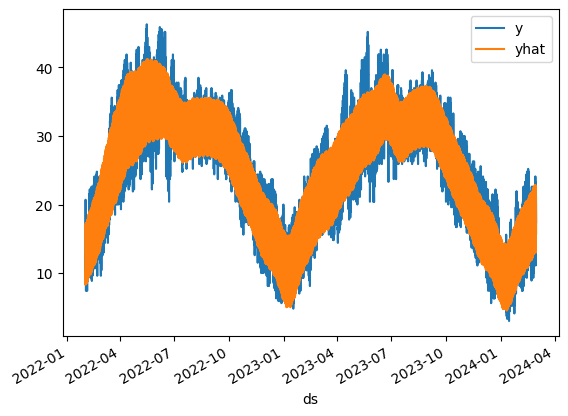

In [51]:
pd.concat([temp.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [53]:
((temp['y']-forecast['yhat'])**2).mean()**0.5

2.927170763212348

## Multivariate

In [122]:
df.head()

,timestamp_local,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
0,2022-02-01 00:00:00,12.6,Gujrāt,PK,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
1,2022-02-01 01:00:00,11.5,Gujrāt,PK,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2,2022-02-01 02:00:00,11.9,Gujrāt,PK,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
3,2022-02-01 03:00:00,12.2,Gujrāt,PK,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
4,2022-02-01 04:00:00,11.9,Gujrāt,PK,430.0,1782.5,60.7,2.7,533.7,377.00,253.3


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18218 entries, 0 to 18217
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp_local  18218 non-null  datetime64[ns]
 1   temp             18218 non-null  float64       
 2   city_name        18218 non-null  object        
 3   country_code     18218 non-null  object        
 4   aqi              18218 non-null  float64       
 5   co               18218 non-null  float64       
 6   no2              18218 non-null  float64       
 7   o3               18218 non-null  float64       
 8   pm10             18218 non-null  float64       
 9   pm25             18218 non-null  float64       
 10  so2              18218 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 1.5+ MB


In [127]:
df = df.set_index("timestamp_local")

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18218 entries, 2022-02-01 00:00:00 to 2024-02-29 23:00:00
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          18218 non-null  float64
 1   city_name     18218 non-null  object 
 2   country_code  18218 non-null  object 
 3   aqi           18218 non-null  float64
 4   co            18218 non-null  float64
 5   no2           18218 non-null  float64
 6   o3            18218 non-null  float64
 7   pm10          18218 non-null  float64
 8   pm25          18218 non-null  float64
 9   so2           18218 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.5+ MB


In [64]:
df.head()

,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
timestamp_local,,,,,,,,,,
2022-02-01 00:00:00,12.6,Gujrāt,PK,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
2022-02-01 01:00:00,11.5,Gujrāt,PK,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2022-02-01 02:00:00,11.9,Gujrāt,PK,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
2022-02-01 03:00:00,12.2,Gujrāt,PK,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
2022-02-01 04:00:00,11.9,Gujrāt,PK,430.0,1782.5,60.7,2.7,533.7,377.00,253.3


In [124]:
df = df[['timestamp_local','temp','aqi','co','no2','o3','pm10','pm25','so2']]

In [125]:
df

,timestamp_local,temp,aqi,co,no2,o3,pm10,pm25,so2
0,2022-02-01 00:00:00,12.6,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
1,2022-02-01 01:00:00,11.5,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2,2022-02-01 02:00:00,11.9,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
3,2022-02-01 03:00:00,12.2,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
4,2022-02-01 04:00:00,11.9,430.0,1782.5,60.7,2.7,533.7,377.00,253.3
...,...,...,...,...,...,...,...,...,...
18213,2024-02-29 19:00:00,20.7,122.0,246.9,23.3,64.7,67.0,43.67,32.3
18214,2024-02-29 20:00:00,18.1,145.0,301.1,30.0,48.0,79.0,52.00,37.0
18215,2024-02-29 21:00:00,18.5,152.0,304.6,26.7,46.7,86.0,56.67,36.7
18216,2024-02-29 22:00:00,17.4,158.0,308.1,23.3,45.3,93.0,61.33,36.3


In [128]:
df.resample('H').mean()

C:\Users\Hassan\AppData\Local\Temp\ipykernel_2232\790626579.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.resample('H').mean()


,temp,aqi,co,no2,o3,pm10,pm25,so2
timestamp_local,,,,,,,,
2022-02-01 00:00:00,12.6,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
2022-02-01 01:00:00,11.5,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2022-02-01 02:00:00,11.9,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
2022-02-01 03:00:00,12.2,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
2022-02-01 04:00:00,11.9,430.0,1782.5,60.7,2.7,533.7,377.00,253.3
...,...,...,...,...,...,...,...,...
2024-02-29 19:00:00,20.7,122.0,246.9,23.3,64.7,67.0,43.67,32.3
2024-02-29 20:00:00,18.1,145.0,301.1,30.0,48.0,79.0,52.00,37.0
2024-02-29 21:00:00,18.5,152.0,304.6,26.7,46.7,86.0,56.67,36.7


C:\Users\Hassan\AppData\Local\Temp\ipykernel_2232\518947561.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.resample('H').mean().plot(subplots=True)


array([<Axes: xlabel='timestamp_local'>, <Axes: xlabel='timestamp_local'>,
       <Axes: xlabel='timestamp_local'>, <Axes: xlabel='timestamp_local'>,
       <Axes: xlabel='timestamp_local'>, <Axes: xlabel='timestamp_local'>,
       <Axes: xlabel='timestamp_local'>, <Axes: xlabel='timestamp_local'>],
      dtype=object)

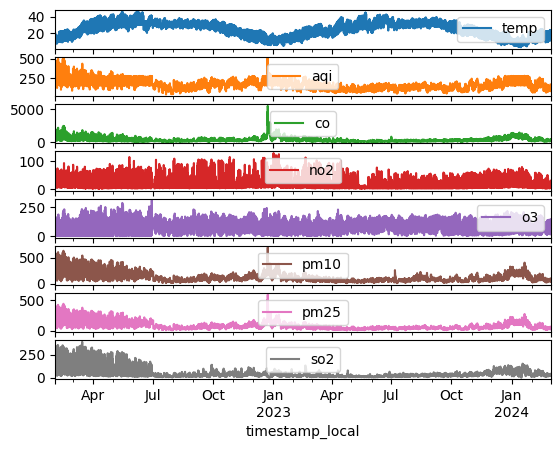

In [129]:
df.resample('H').mean().plot(subplots=True)

In [130]:
df=df.resample('h').mean()

In [131]:
df.head()

,temp,aqi,co,no2,o3,pm10,pm25,so2
timestamp_local,,,,,,,,
2022-02-01 00:00:00,12.6,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
2022-02-01 01:00:00,11.5,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2022-02-01 02:00:00,11.9,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
2022-02-01 03:00:00,12.2,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
2022-02-01 04:00:00,11.9,430.0,1782.5,60.7,2.7,533.7,377.00,253.3


In [132]:
df=df.reset_index()[['timestamp_local','temp','aqi','co','no2','o3','pm10','pm25','so2']].rename({'timestamp_local':'ds','temp':'y'}, axis='columns')

In [133]:
df

,ds,y,aqi,co,no2,o3,pm10,pm25,so2
0,2022-02-01 00:00:00,12.6,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
1,2022-02-01 01:00:00,11.5,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2,2022-02-01 02:00:00,11.9,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
3,2022-02-01 03:00:00,12.2,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
4,2022-02-01 04:00:00,11.9,430.0,1782.5,60.7,2.7,533.7,377.00,253.3
...,...,...,...,...,...,...,...,...,...
18211,2024-02-29 19:00:00,20.7,122.0,246.9,23.3,64.7,67.0,43.67,32.3
18212,2024-02-29 20:00:00,18.1,145.0,301.1,30.0,48.0,79.0,52.00,37.0
18213,2024-02-29 21:00:00,18.5,152.0,304.6,26.7,46.7,86.0,56.67,36.7
18214,2024-02-29 22:00:00,17.4,158.0,308.1,23.3,45.3,93.0,61.33,36.3


In [134]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [135]:
df['month']=df['ds'].dt.month

In [136]:
df['month_bins']=pd.cut(df['month'],bins=3, labels=False)

In [137]:
# m.add_regressor('summer_temp',standardize=False)
m.add_regressor('month_bins',standardize=False,mode='multiplicative')

In [138]:
train = df[:-720]

In [139]:
train.tail()

,ds,y,aqi,co,no2,o3,pm10,pm25,so2,month,month_bins
17491,2024-01-30 19:00:00,14.8,126.0,223.7,19.0,53.7,82.3,45.0,24.3,1,0
17492,2024-01-30 20:00:00,14.4,134.0,250.4,22.0,45.0,85.0,48.0,26.0,1,0
17493,2024-01-30 21:00:00,14.4,131.0,258.3,21.0,45.3,83.0,47.0,27.0,1,0
17494,2024-01-30 22:00:00,14.1,129.0,266.3,20.0,45.7,81.0,46.0,28.0,1,0
17495,2024-01-30 23:00:00,14.1,126.0,274.3,19.0,46.0,79.0,45.0,29.0,1,0


In [140]:
test = df[-720:]

In [141]:
test.head()

,ds,y,aqi,co,no2,o3,pm10,pm25,so2,month,month_bins
17496,2024-01-31 00:00:00,13.7,121.0,242.0,16.0,45.3,77.3,43.33,24.0,1,0
17497,2024-01-31 01:00:00,13.3,117.0,209.7,13.0,44.7,75.7,41.67,19.0,1,0
17498,2024-01-31 02:00:00,13.3,112.0,177.4,10.0,44.0,74.0,40.00,14.0,1,0
17499,2024-01-31 03:00:00,12.2,114.0,163.4,8.7,44.7,79.3,40.67,12.7,1,0
17500,2024-01-31 04:00:00,12.6,116.0,149.4,7.3,45.3,84.7,41.33,11.3,1,0


In [142]:
test.tail()

,ds,y,aqi,co,no2,o3,pm10,pm25,so2,month,month_bins
18211,2024-02-29 19:00:00,20.7,122.0,246.9,23.3,64.7,67.0,43.67,32.3,2,0
18212,2024-02-29 20:00:00,18.1,145.0,301.1,30.0,48.0,79.0,52.00,37.0,2,0
18213,2024-02-29 21:00:00,18.5,152.0,304.6,26.7,46.7,86.0,56.67,36.7,2,0
18214,2024-02-29 22:00:00,17.4,158.0,308.1,23.3,45.3,93.0,61.33,36.3,2,0
18215,2024-02-29 23:00:00,17.4,164.0,311.6,20.0,44.0,100.0,66.00,36.0,2,0


In [143]:
m.fit(train)

21:45:20 - cmdstanpy - INFO - Chain [1] start processing
21:45:40 - cmdstanpy - INFO - Chain [1] done processing


In [144]:
m.params

OrderedDict([('lp__', array([[41663.5]])),
             ('k', array([[0.0620172]])),
             ('m', array([[0.509467]])),
             ('delta',
              array([[ 2.05365e+00, -2.21830e+00, -7.39603e-01, -8.61669e-05,
                      -6.21523e-01,  2.10346e+00, -1.68680e-06,  1.41366e-07,
                      -1.13256e-06, -6.00271e-02, -1.47211e+00,  6.30119e-02,
                       1.27613e+00,  5.89164e-03, -1.85053e-01, -5.47817e-07,
                      -3.58044e+00,  3.19996e+00,  7.67331e-07, -9.05986e-07,
                       1.12405e+00, -3.69720e-03, -6.10151e-08, -2.70049e-01,
                      -1.07074e+00]])),
             ('sigma_obs', array([[0.0547889]])),
             ('beta',
              array([[ 5.85303e-03, -2.41740e-01, -2.95002e-02, -4.24132e-02,
                       4.04521e-03, -3.34476e-03, -1.60543e-02, -6.20389e-03,
                       3.61140e-03, -7.76070e-03, -8.93207e-03, -4.28927e-03,
                      -1.16952e-03, -

In [145]:
future = m.make_future_dataframe(periods=30*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [148]:
future['month_bins'] =df['month_bins']

In [149]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,18.637386,12.903397,23.916078
18212,2024-02-29 20:00:00,17.292398,11.604964,22.536014
18213,2024-02-29 21:00:00,16.389795,10.789756,22.076679
18214,2024-02-29 22:00:00,15.882313,10.215687,21.036524
18215,2024-02-29 23:00:00,15.488930,10.109742,20.680901


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


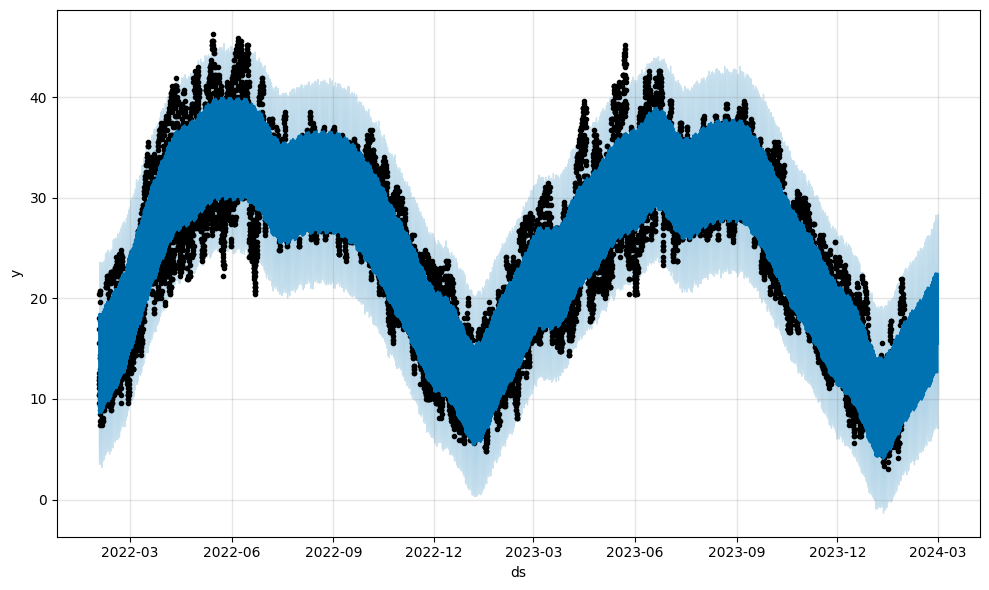

In [150]:
fig1 = m.plot(forecast)

In [151]:
train

,ds,y,aqi,co,no2,o3,pm10,pm25,so2,month,month_bins
0,2022-02-01 00:00:00,12.6,385.0,1339.8,76.0,10.7,491.7,347.67,238.0,2,0
1,2022-02-01 01:00:00,11.5,404.0,1437.6,76.0,9.3,508.3,359.33,268.0,2,0
2,2022-02-01 02:00:00,11.9,421.0,1535.5,76.0,8.0,525.0,371.00,298.0,2,0
3,2022-02-01 03:00:00,12.2,425.0,1659.0,68.3,5.3,529.3,374.00,275.7,2,0
4,2022-02-01 04:00:00,11.9,430.0,1782.5,60.7,2.7,533.7,377.00,253.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
17491,2024-01-30 19:00:00,14.8,126.0,223.7,19.0,53.7,82.3,45.00,24.3,1,0
17492,2024-01-30 20:00:00,14.4,134.0,250.4,22.0,45.0,85.0,48.00,26.0,1,0
17493,2024-01-30 21:00:00,14.4,131.0,258.3,21.0,45.3,83.0,47.00,27.0,1,0
17494,2024-01-30 22:00:00,14.1,129.0,266.3,20.0,45.7,81.0,46.00,28.0,1,0


In [155]:
from prophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '600 days', horizon = '30 days')
df_p = performance_metrics(cv_results)
df_p

  0%|          | 0/7 [00:00<?, ?it/s]

21:49:42 - cmdstanpy - INFO - Chain [1] start processing
21:49:53 - cmdstanpy - INFO - Chain [1] done processing
21:49:55 - cmdstanpy - INFO - Chain [1] start processing
21:50:08 - cmdstanpy - INFO - Chain [1] done processing
21:50:10 - cmdstanpy - INFO - Chain [1] start processing
21:50:21 - cmdstanpy - INFO - Chain [1] done processing
21:50:24 - cmdstanpy - INFO - Chain [1] start processing
21:50:36 - cmdstanpy - INFO - Chain [1] done processing
21:50:38 - cmdstanpy - INFO - Chain [1] start processing
21:50:48 - cmdstanpy - INFO - Chain [1] done processing
21:50:50 - cmdstanpy - INFO - Chain [1] start processing
21:51:02 - cmdstanpy - INFO - Chain [1] done processing
21:51:04 - cmdstanpy - INFO - Chain [1] start processing
21:51:19 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days 00:00:00,3.792833,1.947520,1.463361,0.100695,0.064089,0.092716,0.974206
1,3 days 01:00:00,3.762360,1.939680,1.450375,0.100035,0.061876,0.092047,0.974206
2,3 days 02:00:00,3.732210,1.931893,1.440017,0.099540,0.061409,0.091552,0.974206
3,3 days 03:00:00,3.710478,1.926260,1.431966,0.098990,0.061009,0.090972,0.974206
4,3 days 04:00:00,3.688697,1.920598,1.423101,0.098372,0.060232,0.090293,0.974206
...,...,...,...,...,...,...,...,...
644,29 days 20:00:00,15.375985,3.921222,3.394114,0.263086,0.212936,0.243526,0.827381
645,29 days 21:00:00,15.401455,3.924469,3.400992,0.264026,0.212936,0.244262,0.827381
646,29 days 22:00:00,15.383585,3.922191,3.400710,0.264394,0.213528,0.244504,0.829365
647,29 days 23:00:00,15.386510,3.922564,3.399518,0.264623,0.213528,0.244624,0.829365


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


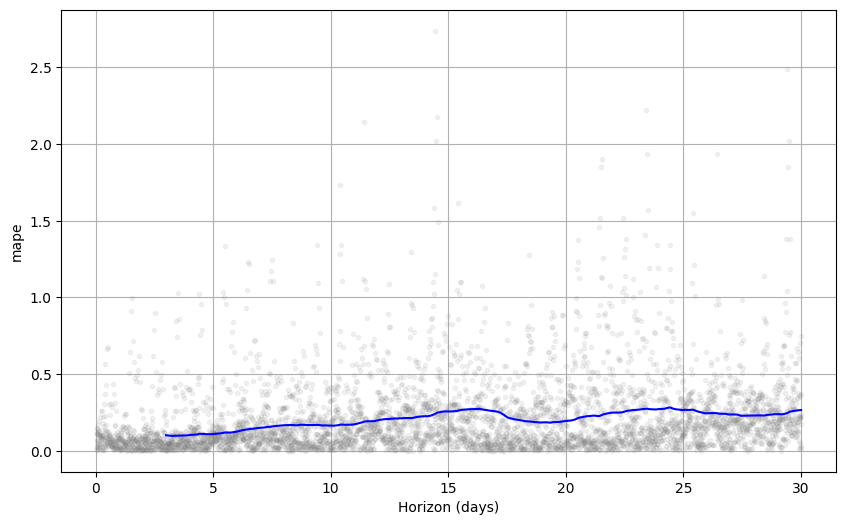

In [157]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')

In [158]:
((temp['y']-forecast['yhat'])**2).mean()**0.5

2.977747563564992